In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('disney.csv')

In [3]:
df.head( )

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [4]:
df.tail( )

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1367,s1368,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [5]:
df.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [6]:
df.isna( ).sum( )

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [7]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [8]:
df.describe( )

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [9]:
summary = df.describe(include='all')
print(summary)

       show_id   type          title     director            cast  \
count     1368   1368           1368          928            1194   
unique    1368      2           1368          578            1132   
top         s1  Movie  A Spark Story  Jack Hannah  Winston Hibler   
freq         1    991              1           17              10   
mean       NaN    NaN            NaN          NaN             NaN   
std        NaN    NaN            NaN          NaN             NaN   
min        NaN    NaN            NaN          NaN             NaN   
25%        NaN    NaN            NaN          NaN             NaN   
50%        NaN    NaN            NaN          NaN             NaN   
75%        NaN    NaN            NaN          NaN             NaN   
max        NaN    NaN            NaN          NaN             NaN   

              country         date_added  release_year rating  duration  \
count            1193               1365   1368.000000   1366      1368   
unique             87

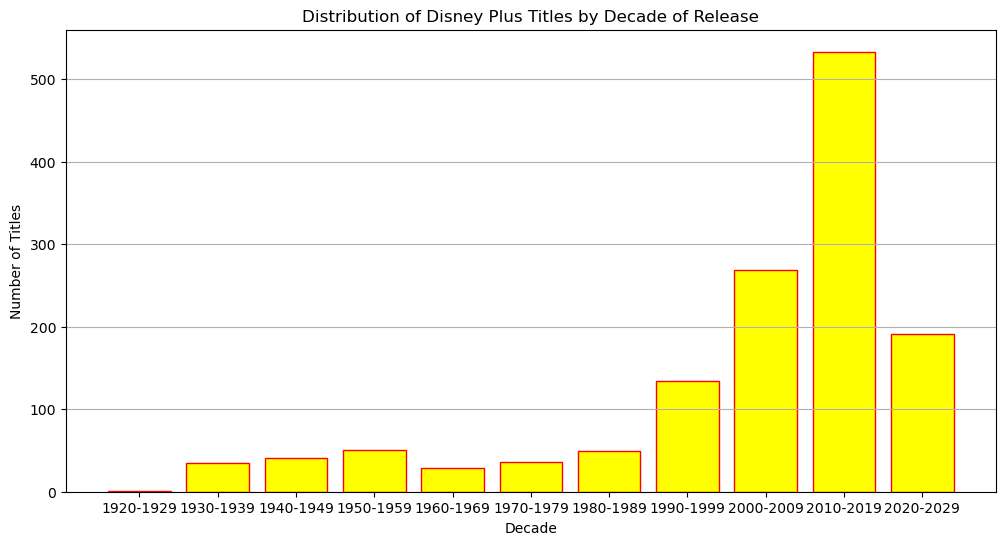

In [10]:
#Plotting Bar Graph by grouping a decade based on titles released

# Group the release years into bins of 10 years
release_years = df['release_year']
bins = range(min(release_years) - min(release_years) % 10, max(release_years) + (10 - max(release_years) % 10) + 1, 10)
labels = [f"{year}-{year+9}" for year in bins[:-1]]
df['decade'] = pd.cut(df['release_year'], bins=bins, labels=labels, right=False,)

# Count the number of titles in each decade
decade_counts = df['decade'].value_counts().sort_index()

# Create a histogram
plt.figure(figsize=(12, 6))
plt.bar(decade_counts.index, decade_counts.values, color='yellow', edgecolor='red')
plt.title('Distribution of Disney Plus Titles by Decade of Release')
plt.xlabel('Decade')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)  # Adjust the x-axis ticks for better readability
plt.grid(axis='y')
plt.show()

In [11]:
# Questions
#1.What are the different types of content available on Disney Plus (Movies, TV Shows)?
#2.How many titles were added in a specific year?
#3Displaying the piechart representing types of items in given dataset
#4.What is the distribution of titles by country of origin?
#5.What are the most common genres/categories listed on Disney Plus?

In [12]:
#1. What are the different types of content available on Disney Plus (Movies, TV Shows)?
contents= df['type'].value_counts( )
print(contents)

type
Movie      991
TV Show    377
Name: count, dtype: int64


In [13]:
#2.How many titles were added in a specific year?

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year
# Count the number of titles added in a specific year (e.g., 2021)
specific_year =int(input("Enter year:"))
titles_added_in_specific_year = df[df['year_added'] == specific_year].shape[0]
print(f"Number of titles added in {specific_year}: {titles_added_in_specific_year}")


Enter year: 2020


Number of titles added in 2020: 358


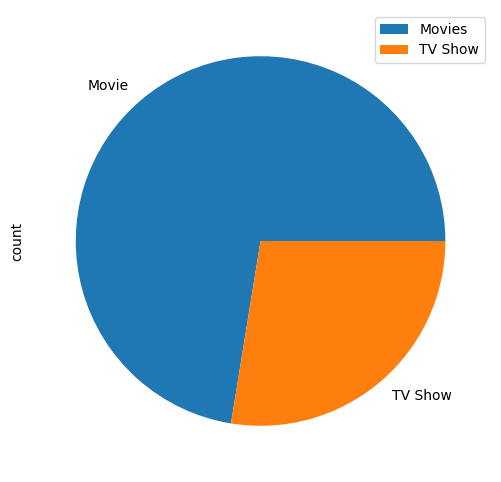

In [14]:
#3 Displaying the piechart representing types of items in given dataset
df['type'].value_counts( ).plot(kind='pie', figsize=(8,6))
plt.legend(["Movies","TV Show"]);

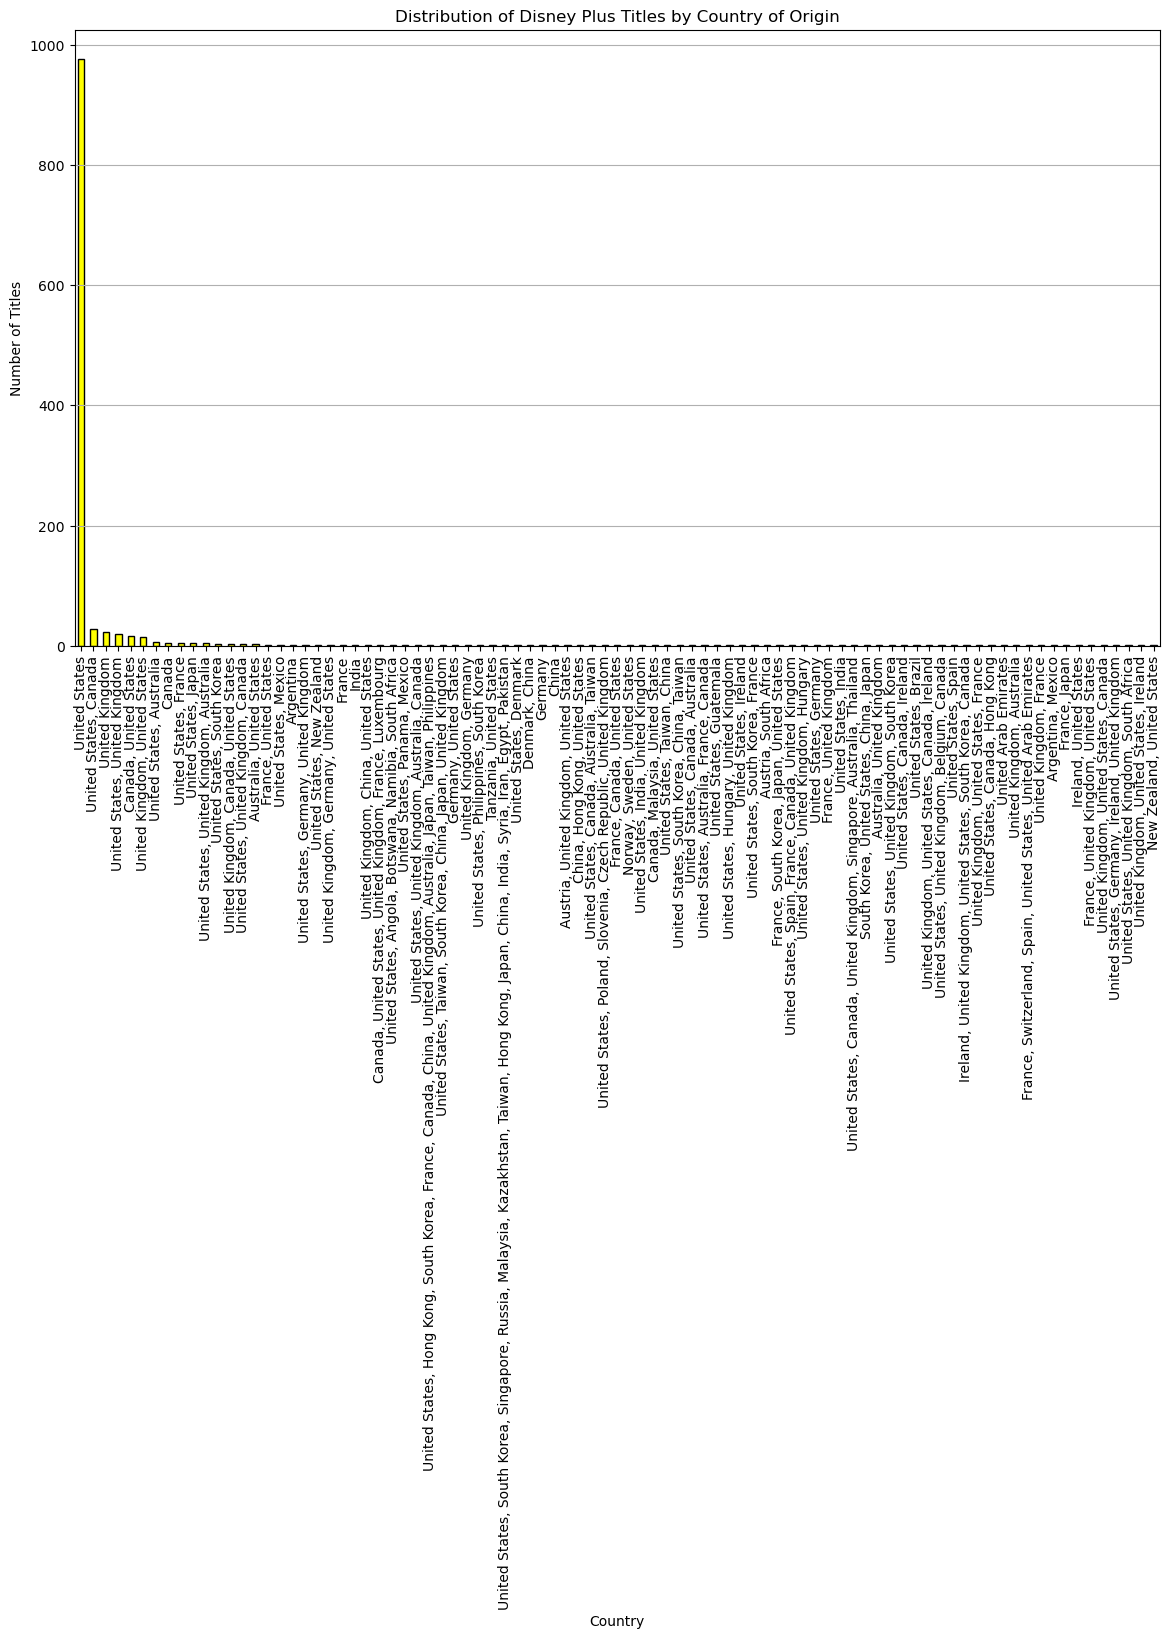

In [16]:
#4. What is the distribution of titles by country of origin?


country_counts = df['country'].value_counts()
plt.figure(figsize=(14, 8))
country_counts.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Distribution of Disney Plus Titles by Country of Origin')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(axis='y')
plt.show()


In [17]:
#5. What are the most common genres/categories listed on Disney Plus?

# Split the 'listed_in' column into individual genres/categories
genres = df['listed_in'].str.split(', ').explode()

# Count the frequency of each genre/category
genre_counts = genres.value_counts()

# Display the most common genres/categories
print("Most common genres/categories listed on Disney Plus:")
print(genre_counts.head(10))

Most common genres/categories listed on Disney Plus:
listed_in
Family              602
Animation           516
Comedy              497
Action-Adventure    438
Animals & Nature    199
Coming of Age       199
Fantasy             180
Documentary         167
Kids                137
Drama               129
Name: count, dtype: int64


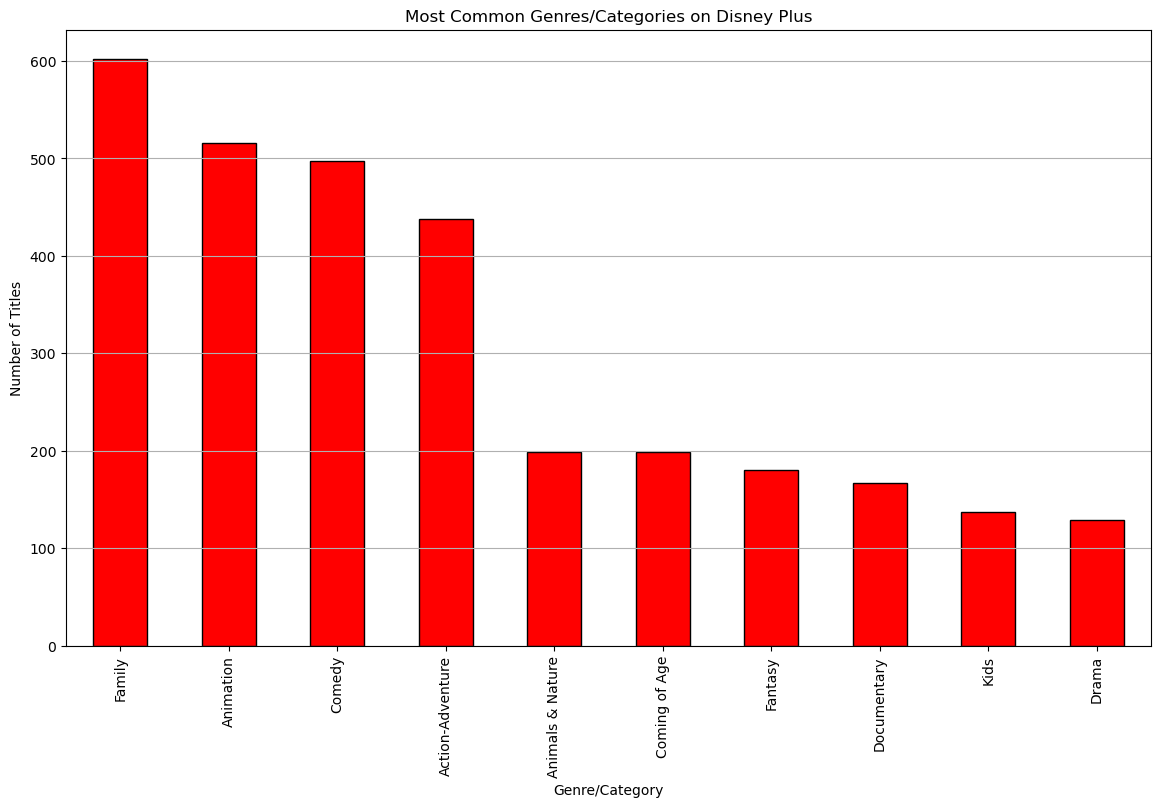

In [18]:
#6 Most common genres/categories in visualization

genres = df['listed_in'].str.split(', ').explode()
genre_counts = genres.value_counts()
plt.figure(figsize=(14, 8))
genre_counts.head(10).plot(kind='bar', color='red', edgecolor='black')
plt.title('Most Common Genres/Categories on Disney Plus')
plt.xlabel('Genre/Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

